In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
# 导入数据
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.shape

(8693, 14)

In [5]:
# 查看是否有缺失值
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
# 查看有哪些类型的数据
list(set(train.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('bool')]

In [7]:
# 查看数据集中唯一值的个数
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

Text(0.5, 1.0, 'Target distribution')

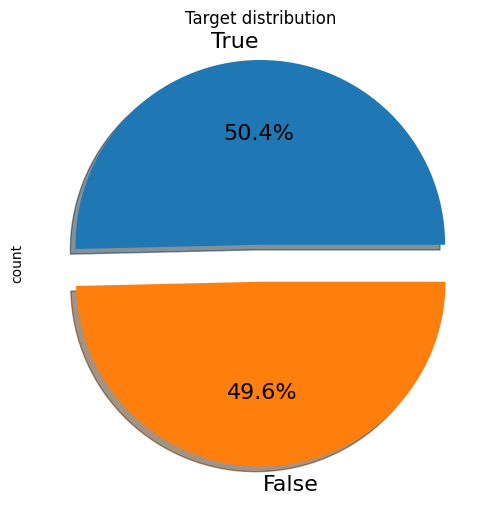

In [8]:
# 画个饼转图先看看Transported的分布情况
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
import seaborn as sns
train.Transported.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,textprops={'fontsize':16}).set_title("Target distribution")

<center>1.连续型变量</center>

Text(0.5, 0, 'Age years')

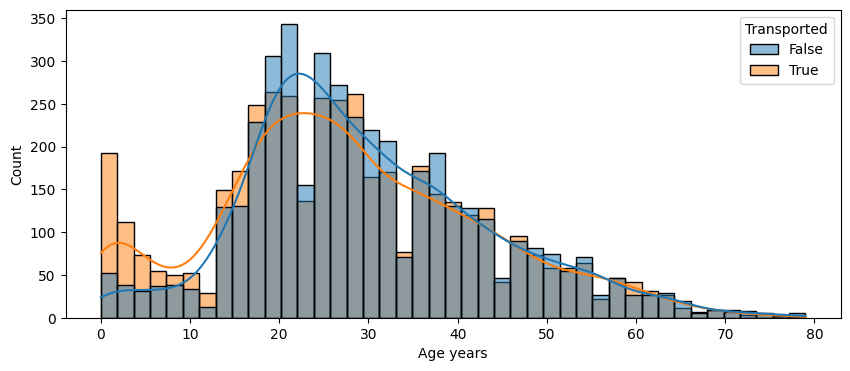

In [9]:
# Age
plt.figure(figsize=(10,4))
sns.histplot(data=train,x='Age',hue='Transported',kde=True)
plt.xlabel('Age years')

In [10]:
# 各项花费
exp_feats=['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# 创建一个新变量exp_sum
train['exp_sum']=train[exp_feats].sum(axis=1)

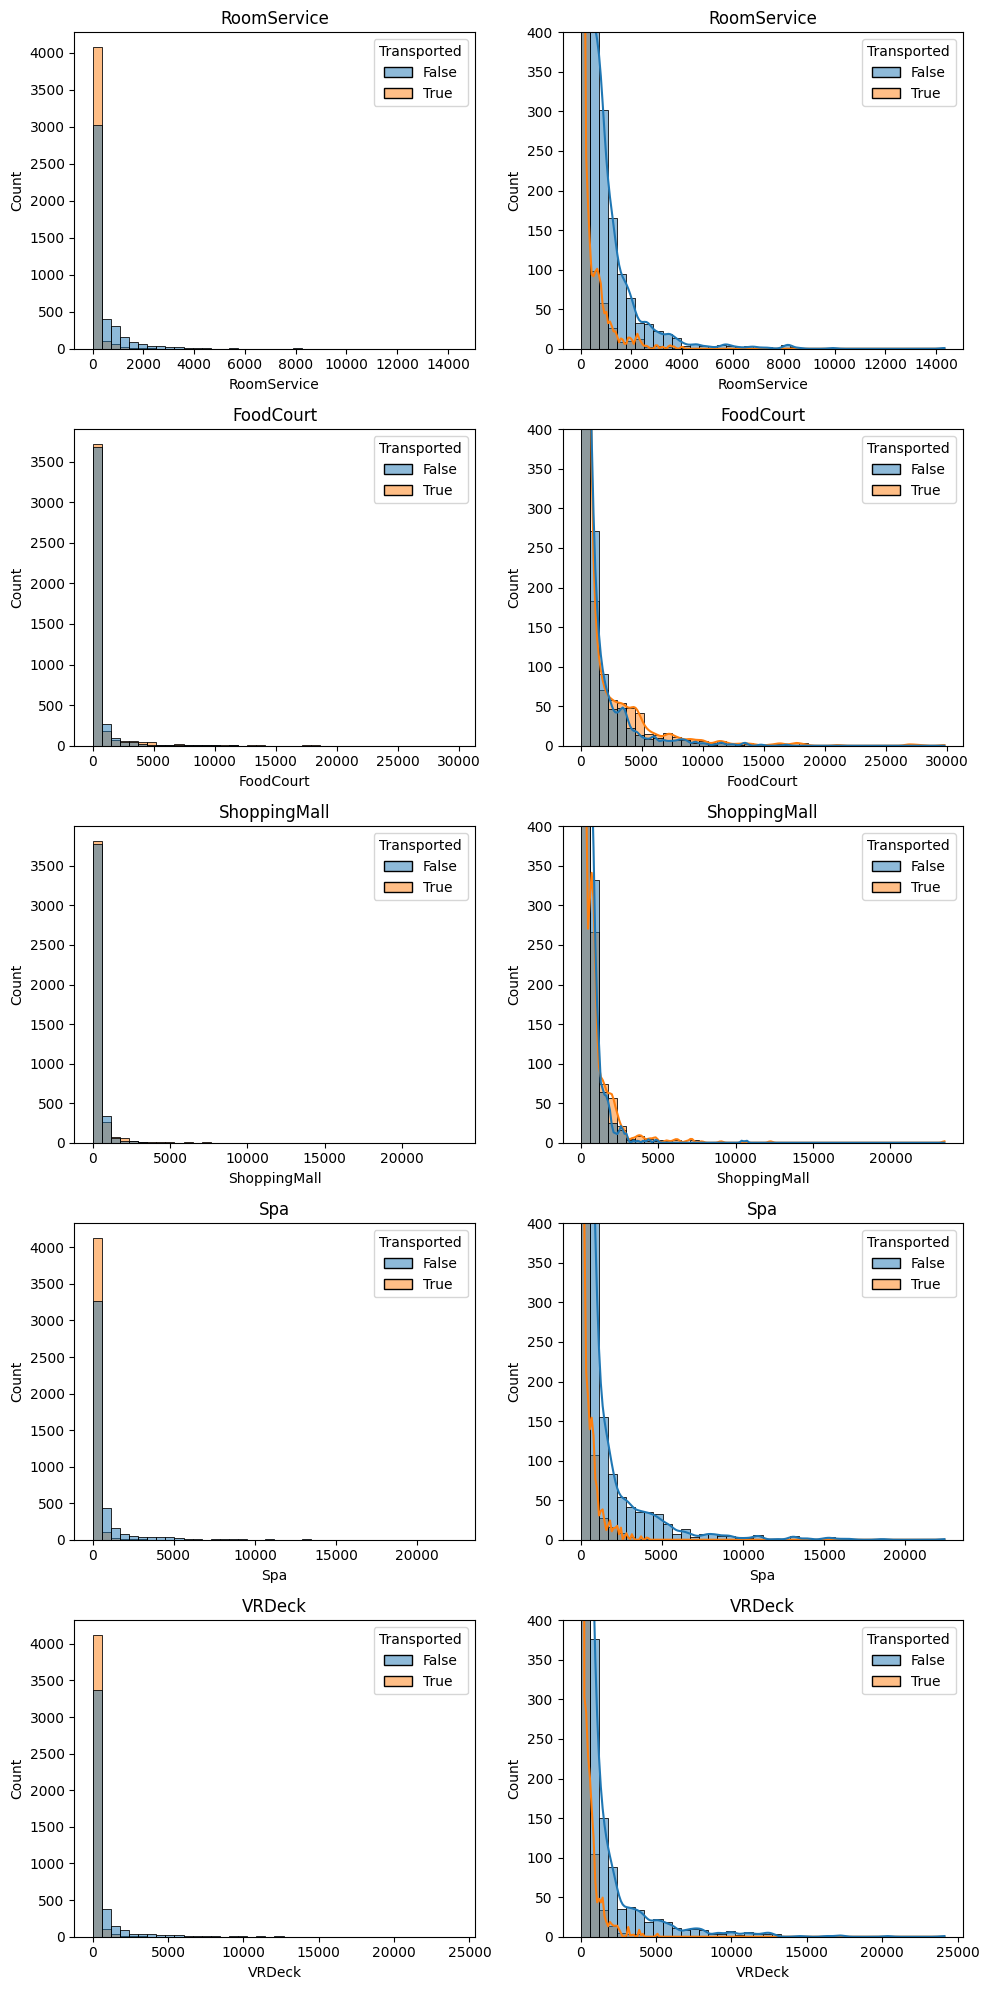

In [11]:
fig=plt.figure(figsize=(10,20))
for i,varname in enumerate(exp_feats):
    # 分割为2列，这是左边第一列
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train,x=varname,kde=False,axes=ax,hue='Transported',bins=40)
    ax.set_title(varname)

    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train,x=varname,hue='Transported',kde=True,axes=ax,bins=40)
    plt.ylim([0,400])
    ax.set_title(varname)
fig.tight_layout()
    

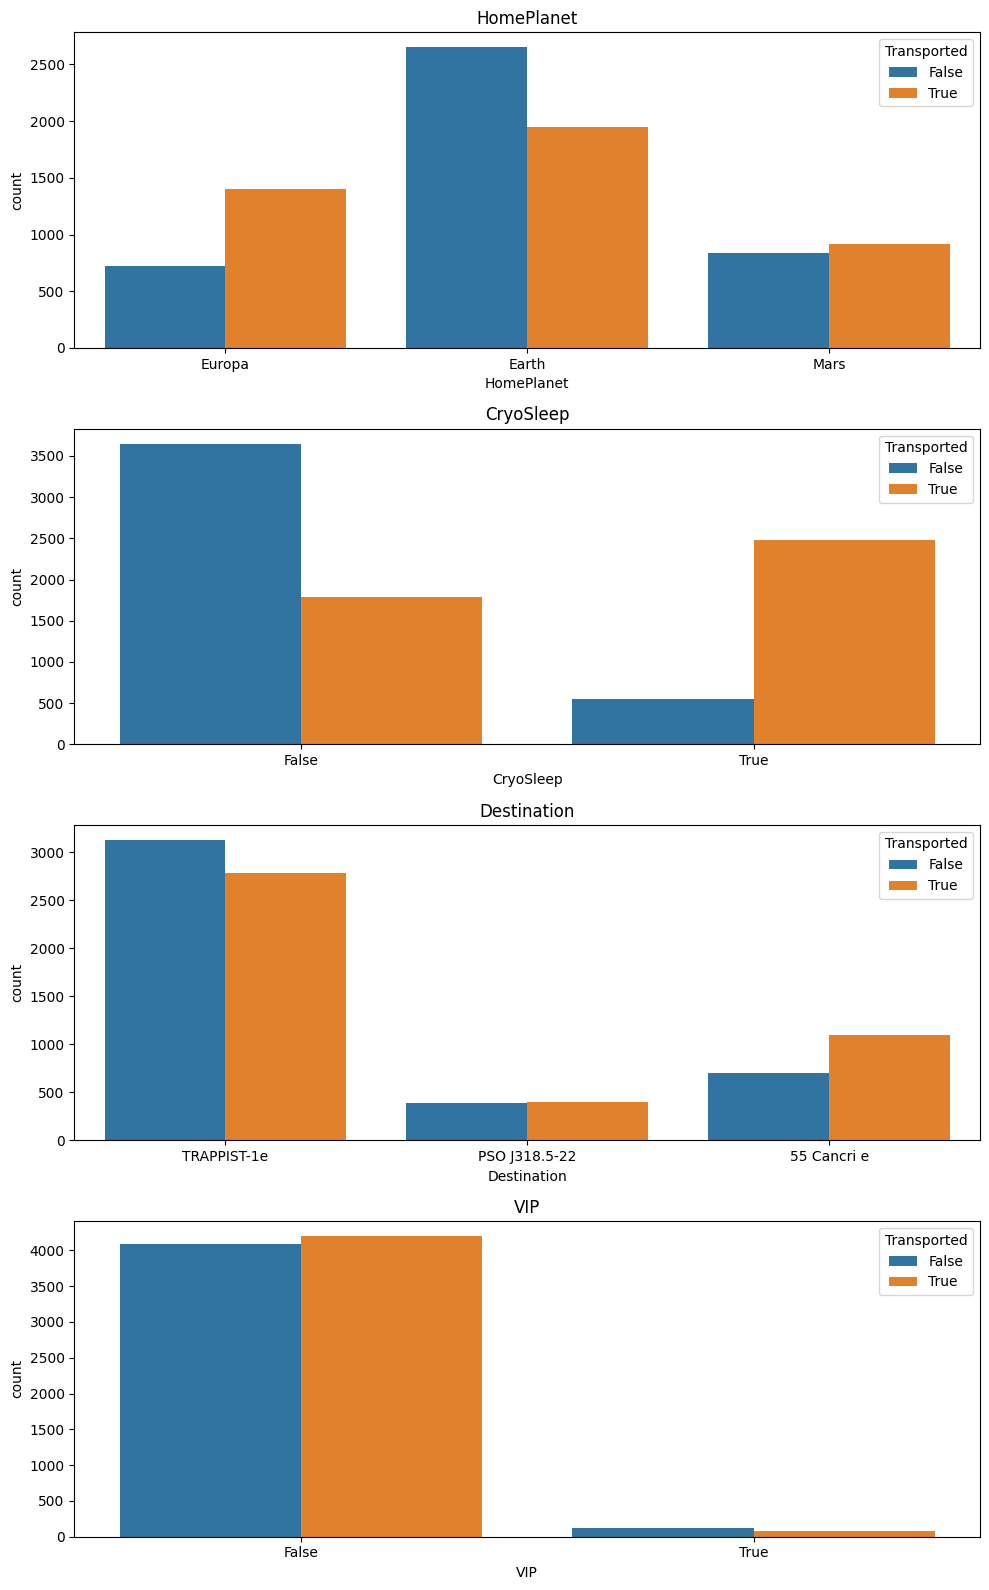

In [12]:
# 分类型变量
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
fig=plt.figure(figsize=(10,16))
for i,varname in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train,x=varname,ax=ax,hue='Transported')
    ax.set_title(varname)
fig.tight_layout()

In [13]:
# 定性变量的处理
qual_feats=['PassengerId', 'Cabin' ,'Name']
train[qual_feats].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


<center>特征工程</center>

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# 对于Age进行处理
train['Age_group']=np.nan
train.loc[train['Age']<=12,'Age_group']='Age_0~12'
train.loc[(train['Age']>13)&(train['Age']<18),'Age_group']='Age_13~17'
train.loc[(train['Age']>=18)&(train['Age']<=25),'Age_group']='Age_18~25'
train.loc[(train['Age']>25) & (train['Age']<=30),'Age_group']='Age_26~30'
train.loc[(train['Age']>30) & (train['Age']<=50),'Age_group']='Age_31~50'
train.loc[train['Age']>50,'Age_group']='Age_51+'

test['Age_group']=np.nan
test.loc[test['Age']<=12,'Age_group']='Age_0~12'
test.loc[(test['Age']>12) & (test['Age']<18),'Age_group']='Age_13~17'
test.loc[(test['Age']>=18) & (test['Age']<=25),'Age_group']='Age_18~25'
test.loc[(test['Age']>25) & (test['Age']<=30),'Age_group']='Age_26~30'
test.loc[(test['Age']>30) & (test['Age']<=50),'Age_group']='Age_31~50'
test.loc[test['Age']>50,'Age_group']='Age_51+'

Text(0.5, 0, 'Age_group')

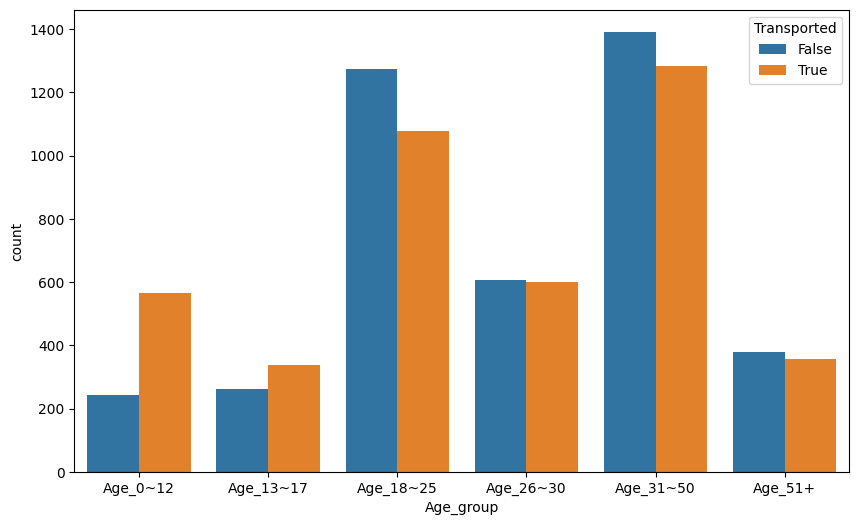

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=train,x='Age_group',hue='Transported',order=['Age_0~12','Age_13~17','Age_18~25','Age_26~30','Age_31~50','Age_51+'])
plt.xlabel('Age_group')

Text(0.5, 0, 'No_spending')

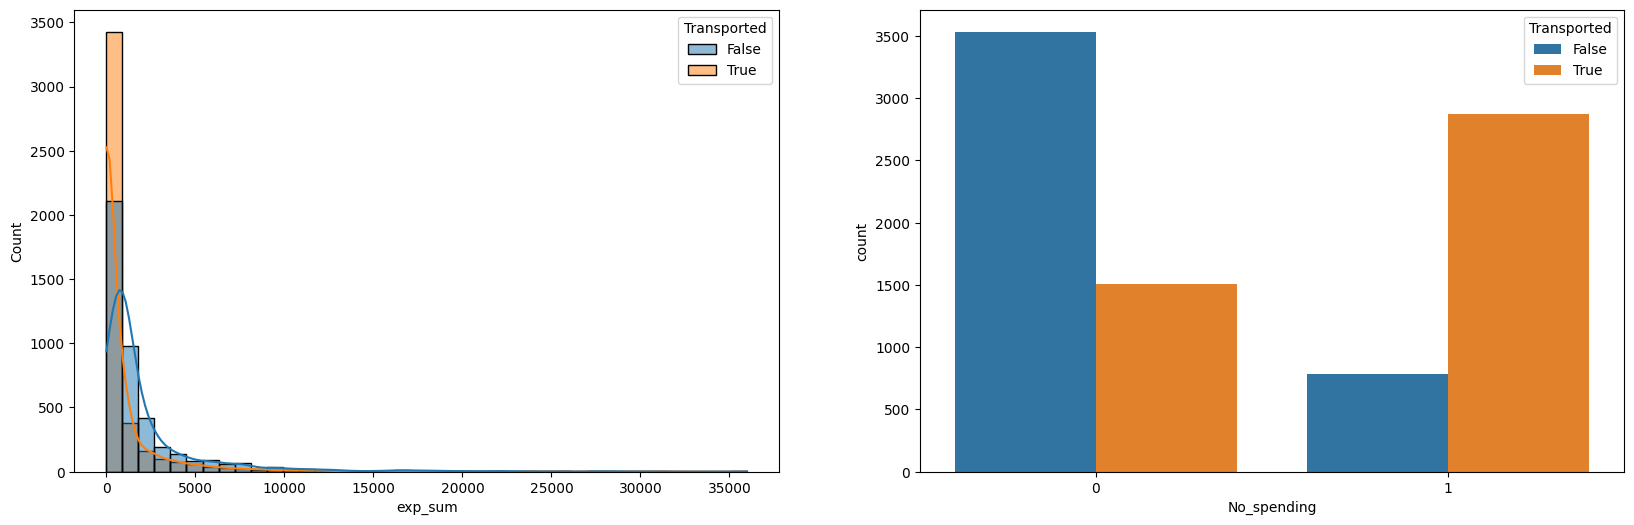

In [17]:
# 对expenditure进行处理
train['No_spending']=(train['exp_sum']==0).astype(int)
test['exp_sum']=test[exp_feats].sum(axis=1)
test['No_spending']=(test['exp_sum']==0).astype(int)

fig=plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(data=train,x='exp_sum',hue='Transported',kde=True,bins=40)
plt.xlabel('exp_sum')

plt.subplot(1,2,2)
sns.countplot(data=train,x='No_spending',hue='Transported')
plt.xlabel('No_spending')

Text(0.5, 0, 'Group_size')

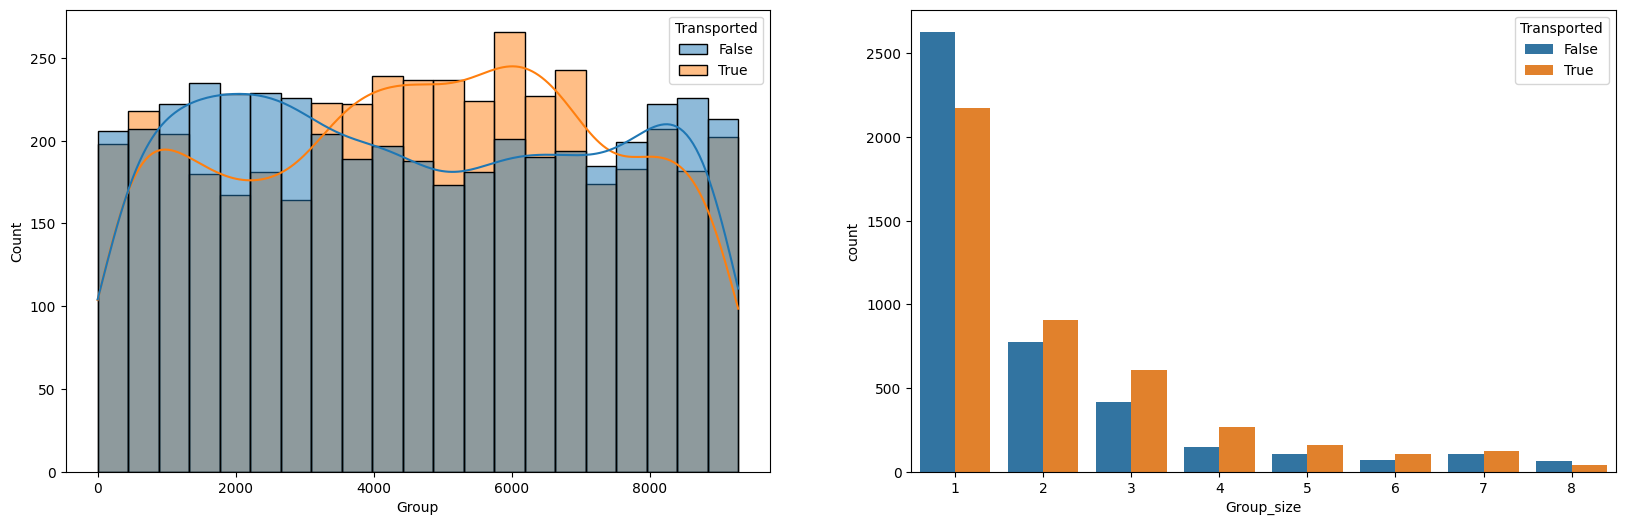

In [18]:
# 对乘客ID进行处理
train['Group']=train['PassengerId'].apply(lambda x:x.split('_')[0]).astype(int)
test['Group']=test['PassengerId'].apply(lambda x:x.split('_')[0]).astype(int)

# 在创建一个新的变量Group_size，用来表示每一个Group对应的大小是多少(与作者写的不一致)
train['Group_size']=train['Group'].map(lambda x:pd.concat([train['Group'],test['Group']]).value_counts()[x])
test['Group_size']=test['Group'].map(lambda x:pd.concat([train['Group'],test['Group']]).value_counts()[x])

fig=plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(data=train,x='Group',hue='Transported',kde=True)
plt.xlabel('Group')

plt.subplot(1,2,2)
sns.countplot(data=train,x='Group_size',hue='Transported')
plt.xlabel('Group_size')

(0.0, 3000.0)

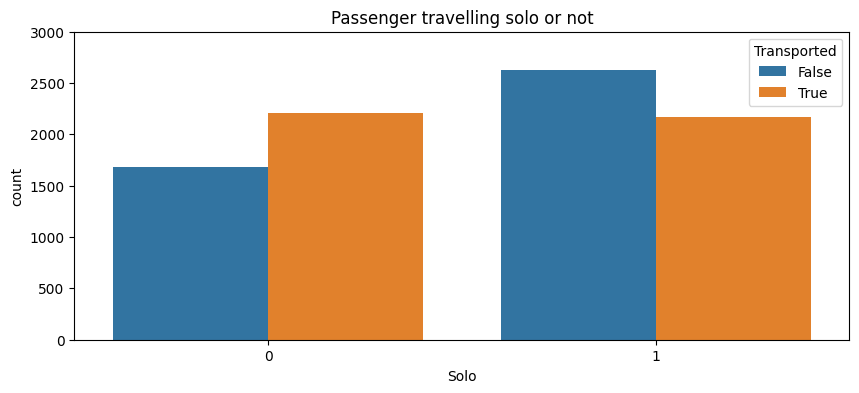

In [19]:
#创建单人组Solo
train['Solo']=(train['Group_size']==1).astype(int)
test['Solo']=(test['Group_size']==1).astype(int)

plt.figure(figsize=(10,4))
sns.countplot(data=train, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

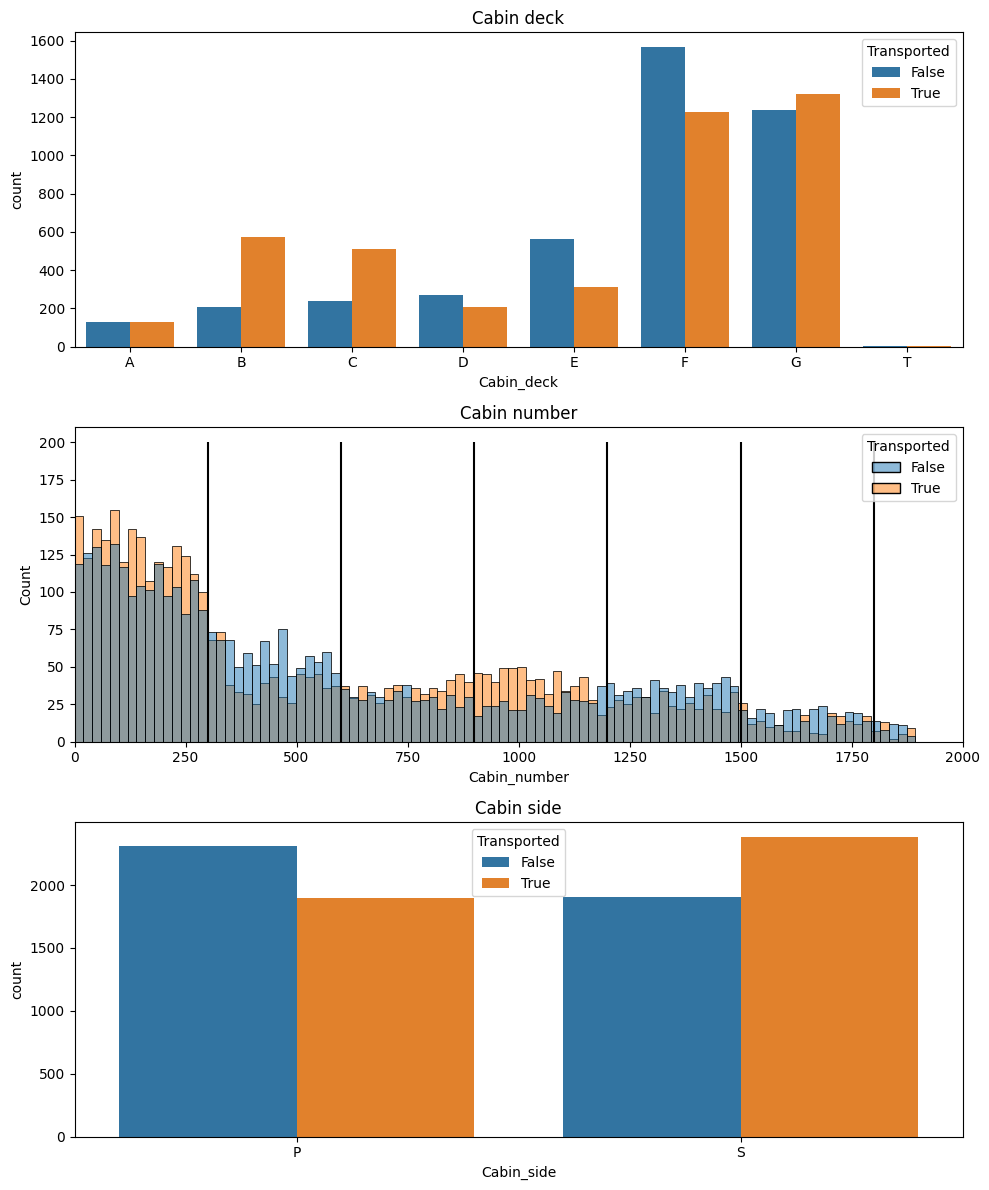

In [20]:
# 先填充缺失值数据
train['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

# 新的特征提取-->对于Cabin的提取
train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

test['Cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['Cabin_number'] = test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])

# 将缺失值放进提取完成之后的数据
train.loc[train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train.loc[train['Cabin_number']==9999, 'Cabin_number']=np.nan
train.loc[train['Cabin_side']=='Z', 'Cabin_side']=np.nan
test.loc[test['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test.loc[test['Cabin_number']==9999, 'Cabin_number']=np.nan
test.loc[test['Cabin_side']=='Z', 'Cabin_side']=np.nan

# 去除Cabin(我们已经将其提取完了)
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)


fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

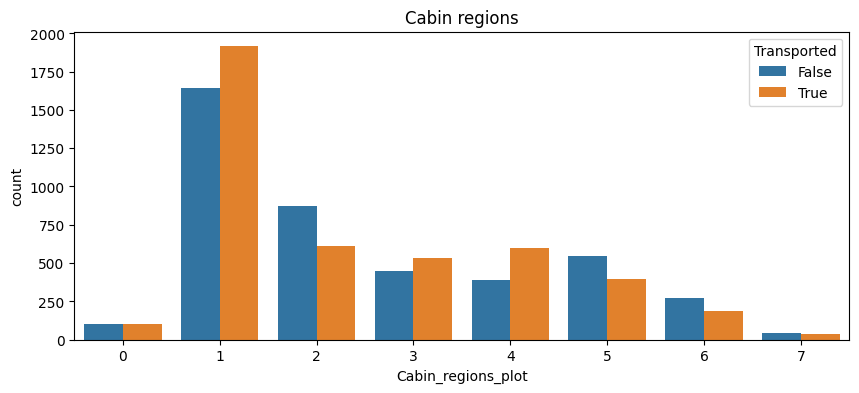

In [21]:
# 对Cabin_number进行特征提取
train['Cabin_region1']=(train['Cabin_number']<300).astype(int)   
train['Cabin_region2']=((train['Cabin_number']>=300) & (train['Cabin_number']<600)).astype(int)
train['Cabin_region3']=((train['Cabin_number']>=600) & (train['Cabin_number']<900)).astype(int)
train['Cabin_region4']=((train['Cabin_number']>=900) & (train['Cabin_number']<1200)).astype(int)
train['Cabin_region5']=((train['Cabin_number']>=1200) & (train['Cabin_number']<1500)).astype(int)
train['Cabin_region6']=((train['Cabin_number']>=1500) & (train['Cabin_number']<1800)).astype(int)
train['Cabin_region7']=(train['Cabin_number']>=1800).astype(int)


test['Cabin_region1']=(test['Cabin_number']<300).astype(int)   
test['Cabin_region2']=((test['Cabin_number']>=300) & (test['Cabin_number']<600)).astype(int)
test['Cabin_region3']=((test['Cabin_number']>=600) & (test['Cabin_number']<900)).astype(int)
test['Cabin_region4']=((test['Cabin_number']>=900) & (test['Cabin_number']<1200)).astype(int)
test['Cabin_region5']=((test['Cabin_number']>=1200) & (test['Cabin_number']<1500)).astype(int)
test['Cabin_region6']=((test['Cabin_number']>=1500) & (test['Cabin_number']<1800)).astype(int)
test['Cabin_region7']=(test['Cabin_number']>=1800).astype(int)


# 最小为0，最大为7
plt.figure(figsize=(10,4))
train['Cabin_regions_plot']=(train['Cabin_region1']+2*train['Cabin_region2']+3*train['Cabin_region3']+4*train['Cabin_region4']+5*train['Cabin_region5']+6*train['Cabin_region6']+7*train['Cabin_region7']).astype(int)
sns.countplot(data=train, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
train.drop('Cabin_regions_plot', axis=1, inplace=True)

Surname
Unknown       200
Casonston      18
Oneiles        16
Domington      15
Litthews       15
             ... 
Barles          1
Tiouserful      1
Rasty           1
Sulie           1
Sionerorly      1
Name: count, Length: 2218, dtype: int64
Surname
Unknown        94
Extraly        14
Hopperett      13
Tranklinay     11
Garrez         10
               ..
Dayers          1
Hardsonerry     1
Baciffhaut      1
Fine            1
Cure            1
Name: count, Length: 1726, dtype: int64


Text(0.5, 1.0, 'Family size')

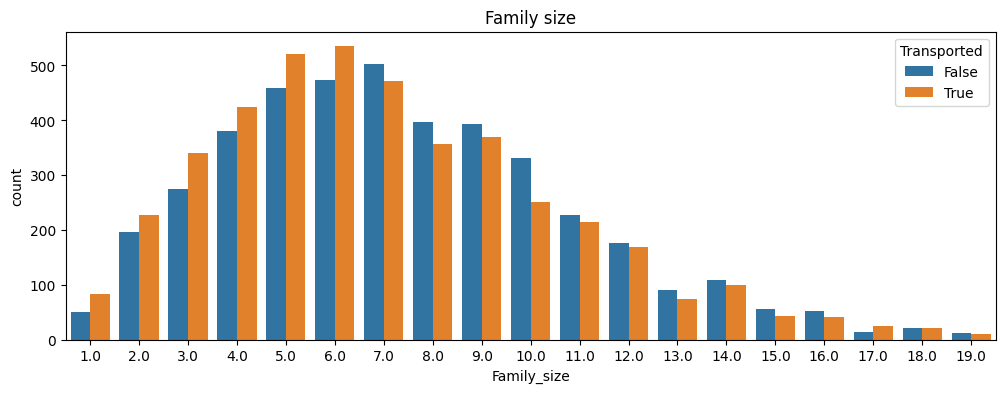

In [22]:
# 填补缺失值
train['Name'].fillna('Unknown Unknown', inplace=True)
test['Name'].fillna('Unknown Unknown', inplace=True)

train['Surname']=train['Name'].str.split().str[-1]
test['Surname']=test['Name'].str.split().str[-1]

# 创建新变量Family_size
train['Family_size']=train['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])
test['Family_size']=test['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])


print(train['Surname'].value_counts().sort_values(ascending=False))
print(test['Surname'].value_counts().sort_values(ascending=False))

# 将缺失值放回
train.loc[train['Surname']=='Unknown','Surname']=np.nan
train.loc[train['Family_size']>100,'Family_size']=np.nan
test.loc[test['Surname']=='Unknown','Surname']=np.nan
test.loc[test['Family_size']>100,'Family_size']=np.nan

# 去除Name变量
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

plt.figure(figsize=(12,4))
sns.countplot(data=train, x='Family_size', hue='Transported')
plt.title('Family size')

# <center>缺失值的处理</center>

In [23]:
# 先拷贝一份
y=train['Transported'].copy().astype(int)
X=train.drop('Transported', axis=1).copy()

# 合并数据框，正好test中也没有Transported，二者格式一致
data=pd.concat([X, test], axis=0).reset_index(drop=True)

In [24]:
# 观察哪些列名下存在缺失值
na_cols=data.columns[data.isna().any()].tolist()

# 缺失值汇总
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,288,2.22
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36
Spa,284,2.19
VRDeck,268,2.07


Text(0.5, 1.0, 'Heatmap of missing values')

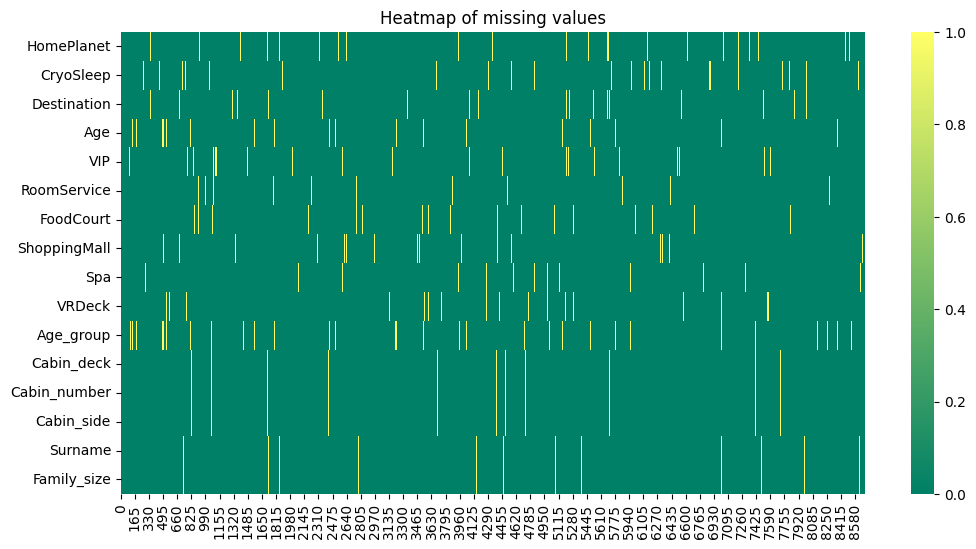

In [25]:
# 缺失值热力图
plt.figure(figsize=(12,6))
sns.heatmap(train[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

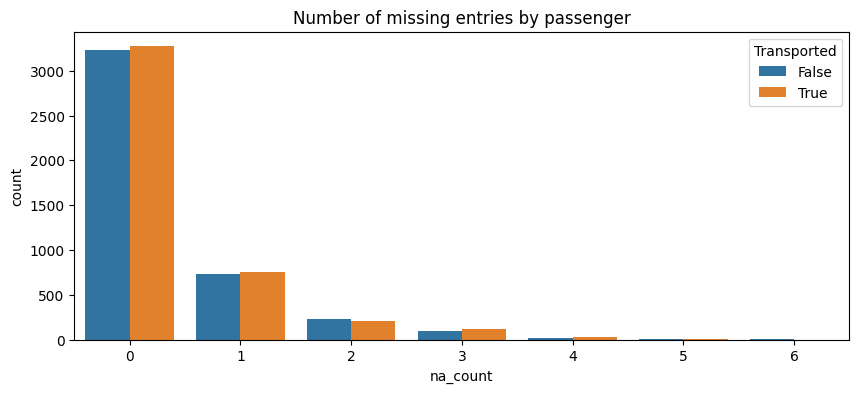

In [26]:
# 乘客缺失值的柱状图
train['na_count']=train.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
train.drop('na_count', axis=1, inplace=True)

In [27]:
# Joint distribution of Group and HomePlanet
GHP_gb=data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
GHP_gb.head()

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0


In [28]:
# 这就是为什么上面展开的是那种样子的原因
data[['Group','HomePlanet']]

,Group,HomePlanet
0,1,Europa
1,2,Earth
2,3,Europa
3,3,Europa
4,4,Earth
...,...,...
12965,9266,Earth
12966,9269,Earth
12967,9271,Mars
12968,9273,Europa


Text(0.5, 1.0, 'Number of unique home planets per group')

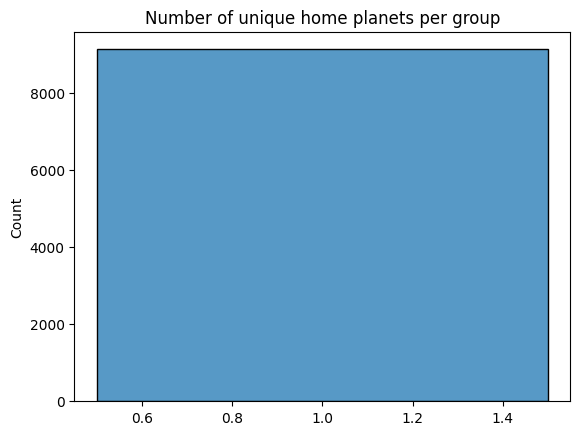

In [29]:
# 看看每个Group与HomePlanet是不是一一对应
sns.histplot((GHP_gb>0).sum(axis=1))
plt.title('Number of unique home planets per group')

In [30]:
print(data.HomePlanet.isna().sum())
print(data.Group.isna().sum())

288
0


<mark>这个结果可以看出，对于每一个Group，对应的HomePlanet是唯一的，我们HomePlanet有缺失值288个，可以找那些与HomePlanet缺失值中Group相同的乘客，将他们的HomePlanet作为结果填充缺失值</mark>

In [31]:
# 之前的缺失值
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a group with known HomePlanet
GHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

# Fill corresponding missing values
data.loc[GHP_index,'HomePlanet']=data.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

# 前后对比
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


<Axes: xlabel='Cabin_deck', ylabel='HomePlanet'>

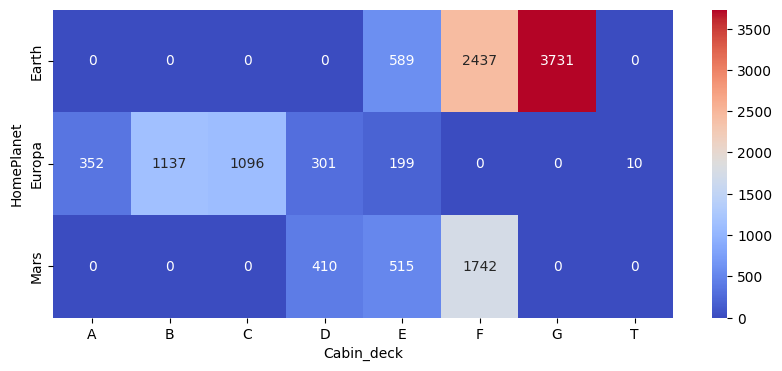

In [32]:
# Joint distribution of CabinDeck and HomePlanet
CDHP_gb=data.groupby(['Cabin_deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T,annot=True, fmt='g',cmap='coolwarm')

A、B、C、T只会来自于Europa这个星球，G只会来自于Earth这个星球

In [33]:
data.Cabin_deck.isna().sum()

299

In [34]:
# 之前的缺失值数
HP_bef=data['HomePlanet'].isna().sum()

# Decks A, B, C or T came from Europa
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='G'), 'HomePlanet']='Earth'

# 填充前后对比
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 157
#HomePlanet missing values after: 94


Text(0.5, 1.0, 'Number of unique planets per surname')

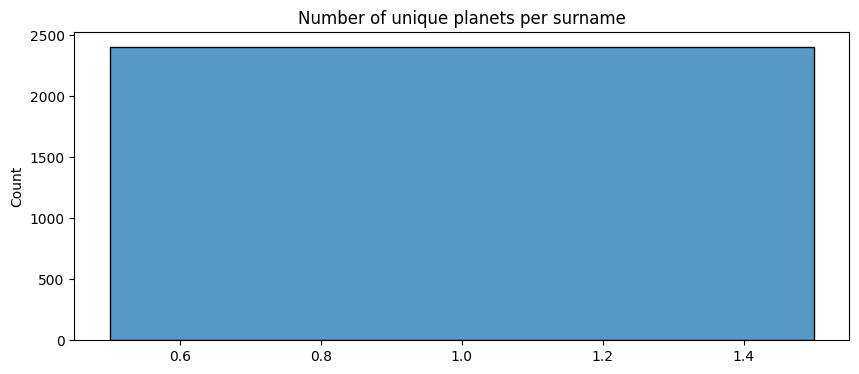

In [35]:
# Joint distribution of Surname and HomePlanet
SHP_gb=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,4))
sns.histplot((SHP_gb>0).sum(axis=1))
plt.title('Number of unique planets per surname')

In [36]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()


# Passengers with missing HomePlanet and in a family with known HomePlanet
SHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

# Fill corresponding missing values
data.loc[SHP_index,'HomePlanet']=data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 94
#HomePlanet missing values after: 10


&emsp;&emsp;根据3个变量与HomePlanet之间的关系进行缺失值的填充，我们可以发现，HomePlanet的缺失值数量从原来的288-->157-->94-->10

In [37]:
# Only 10 HomePlanet missing values left - let's look at them
data[data['HomePlanet'].isna()][['PassengerId','HomePlanet','Destination','Cabin_deck']]

,PassengerId,HomePlanet,Destination,Cabin_deck
2274,2443_01,NaN,TRAPPIST-1e,D
2631,2817_01,NaN,TRAPPIST-1e,F
3091,3331_01,NaN,TRAPPIST-1e,F
4548,4840_01,NaN,TRAPPIST-1e,F
5762,6108_01,NaN,TRAPPIST-1e,F
8969,0616_01,NaN,TRAPPIST-1e,E
10583,4052_01,NaN,TRAPPIST-1e,D
11913,7065_01,NaN,TRAPPIST-1e,E
12551,8435_01,NaN,TRAPPIST-1e,F
12725,8775_01,NaN,TRAPPIST-1e,D


In [38]:
set(data[data['HomePlanet'].isna()][['PassengerId','HomePlanet','Destination','Cabin_deck']]['Cabin_deck'])

{'D', 'E', 'F'}

&emsp;&emsp;可以看出，剩下的缺失值的乘客，目的地都是TRAPPIST-1e，现在来看看这个变量是否会指定唯一一个HomePlanet

<Axes: xlabel='HomePlanet', ylabel='Destination'>

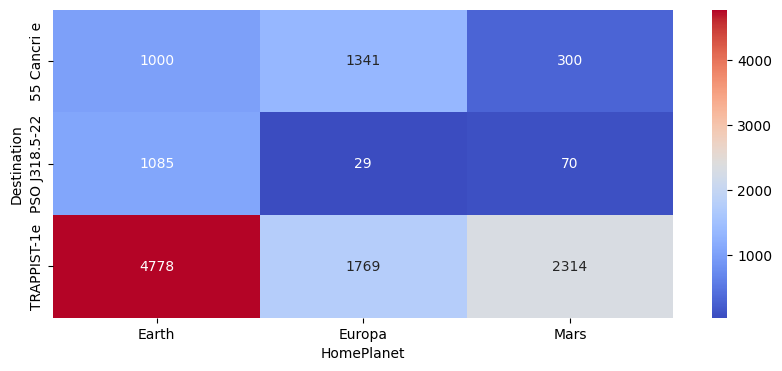

In [39]:
# Joint distribution of HomePlanet and Destination
HPD_gb=data.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')

&emsp;&emsp;可以看出，大多数HomePlanet为Earth的乘客，目的地为TRAPPIST-1e，我们可以近似的认为缺失值HomePlanet为Earth，但是前面的Cabin_deck图像显示，D甲板的没有人来自于Earth，所以在这里我们先要筛除这10个乘客中甲板编号是D的人；再次观察，可以发现这些甲板编号为D的大部分HomePlanet为Mars

In [40]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
data.loc[(data['HomePlanet'].isna()) & ~(data['Cabin_deck']=='D'), 'HomePlanet']='Earth'
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 10
#HomePlanet missing values after: 0


&emsp;&emsp;经过一系列填充，我们的HomePlanet最终没有缺失值的存在了

In [41]:
data.isna().sum().sort_values(ascending=False)

Age_group        411
CryoSleep        310
ShoppingMall     306
Cabin_deck       299
Cabin_side       299
Cabin_number     299
VIP              296
Family_size      294
Surname          294
FoodCourt        289
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
Cabin_region6      0
Cabin_region5      0
Cabin_region4      0
Cabin_region7      0
Cabin_region2      0
Cabin_region3      0
PassengerId        0
Cabin_region1      0
Solo               0
Group_size         0
HomePlanet         0
No_spending        0
exp_sum            0
Group              0
dtype: int64

In [42]:
# Missing values before
D_bef=data['Destination'].isna().sum()

# Fill missing Destination values with mode
# 大部分乘客的目的地都是TRAPPIST-1e，直接使用该目的地进行填充
data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Print number of missing values left
print('#Destination missing values before:',D_bef)
print('#Destination missing values after:',data['Destination'].isna().sum())

#Destination missing values before: 274
#Destination missing values after: 0


Text(0.5, 1.0, 'Number of unique surnames by group')

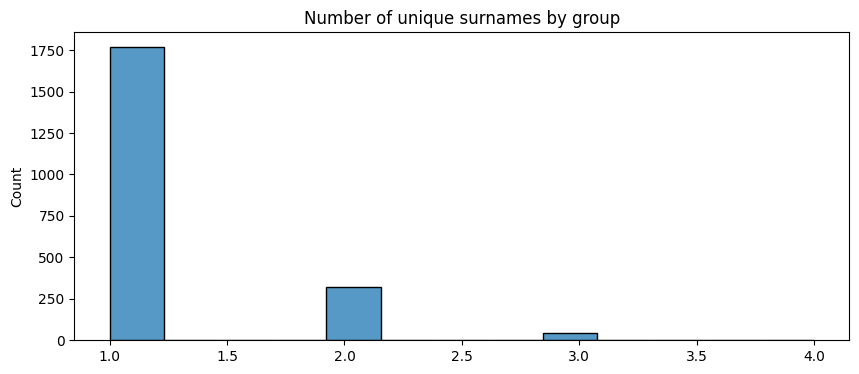

In [43]:
# Joint distribution of Group and Surname
GSN_gb=data[data['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,4))
sns.histplot((GSN_gb>0).sum(axis=1))
plt.title('Number of unique surnames by group')

In [44]:
# Missing values before
SN_bef=data['Surname'].isna().sum()




# Passengers with missing Surname and in a group with known majority Surname
GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(GSN_gb.index)].index





# Fill corresponding missing values
data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['Group'].map(lambda x:GSN_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Surname missing values before:',SN_bef)
print('#Surname missing values after:',data['Surname'].isna().sum())

#Surname missing values before: 294
#Surname missing values after: 155


In [45]:
# Replace NaN's with outliers (so we can use map)
data['Surname'].fillna('Unknown', inplace=True)

# Update family size feature
# 之前的Family_size是每一个名字出现的次数
data['Family_size']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])
print(data.Surname.value_counts().sort_values(ascending=False))

# Put NaN's back in place of outliers
data.loc[data['Surname']=='Unknown','Surname']=np.nan

# Say unknown surname means no family
data.loc[data['Family_size']>100,'Family_size']=0

Surname
Unknown        155
Buckentry       19
Mclardson       19
Belley          19
Fowlesterez     18
              ... 
Ightive          1
Whetingert       1
Mirantant        1
Cak              1
Sam              1
Name: count, Length: 2407, dtype: int64


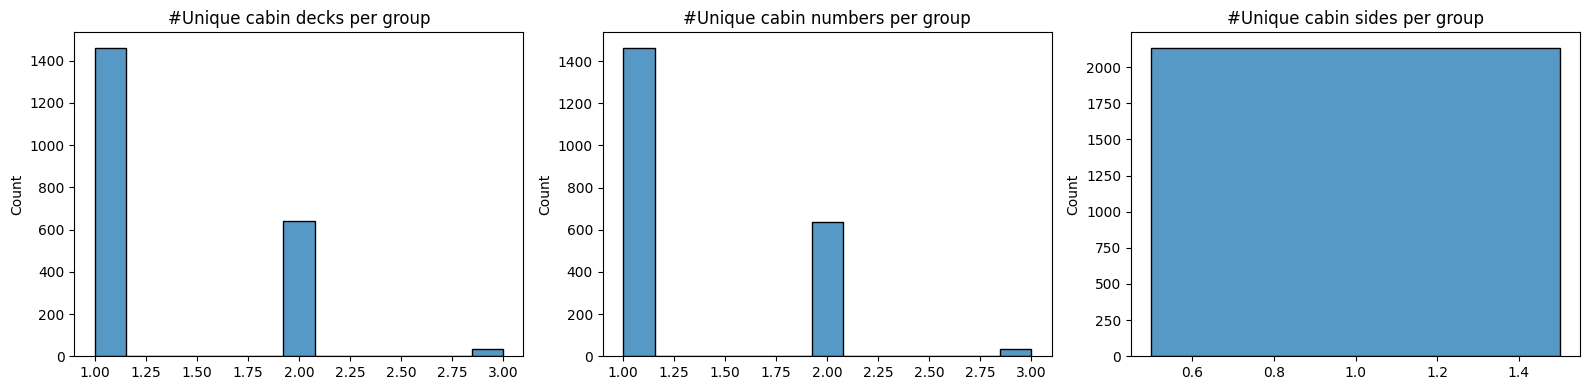

In [46]:
# Joint distribution of Group and Cabin features
GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
GCN_gb=data[data['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)
GCS_gb=data[data['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

# Countplots
fig=plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.histplot((GCD_gb>0).sum(axis=1))
plt.title('#Unique cabin decks per group')

plt.subplot(1,3,2)
sns.histplot((GCN_gb>0).sum(axis=1))
plt.title('#Unique cabin numbers per group')

plt.subplot(1,3,3)
sns.histplot((GCS_gb>0).sum(axis=1))
plt.title('#Unique cabin sides per group')
fig.tight_layout()

&emsp;&emsp;可以看出，唯一与Group确定的是Cabin_side，剩下的虽然不是一一对应，但是唯一值的也占据大部分

In [47]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Passengers with missing Cabin side and in a group with known Cabin side
GCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index

# Fill corresponding missing values
data.loc[GCS_index,'Cabin_side']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 299
#Cabin_side missing values after: 162


In [48]:
data.isna().sum().sort_values(ascending=False)

Age_group        411
CryoSleep        310
ShoppingMall     306
Cabin_number     299
Cabin_deck       299
VIP              296
FoodCourt        289
Spa              284
Age              270
VRDeck           268
RoomService      263
Cabin_side       162
Surname          155
Cabin_region7      0
Cabin_region6      0
Cabin_region5      0
Cabin_region4      0
Cabin_region3      0
Cabin_region2      0
PassengerId        0
Group              0
Cabin_region1      0
Solo               0
Group_size         0
HomePlanet         0
No_spending        0
exp_sum            0
Destination        0
Family_size        0
dtype: int64

<Axes: ylabel='Count'>

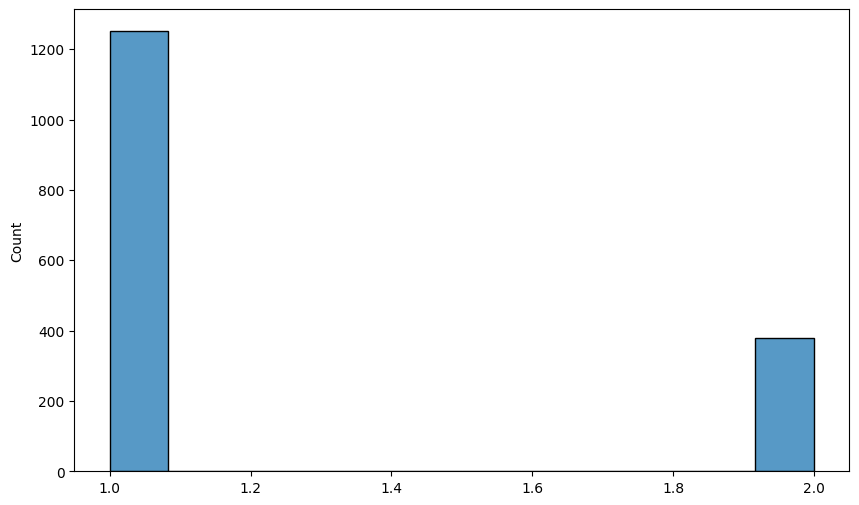

In [49]:
# Joint distribution of Surname and Cabin side
SCS_gb=data[data['Group_size']>1].groupby(['Surname','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

# Ratio of sides
# SCS_gb['Ratio']=SCS_gb['P']/(SCS_gb['P']+SCS_gb['S'])

# Histogram of ratio
# plt.figure(figsize=(10,4))
# sns.histplot(SCS_gb['Ratio'], kde=True, binwidth=0.05)
# plt.title('Ratio of cabin side by surname')

# 按照之前的写法，先看是不是唯一对应的，或者大部分是一一对应的，然后在进行对Surname的缺失值填充
plt.figure(figsize=(10,6))
sns.histplot((SCS_gb>0).sum(axis=1))


In [50]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Drop ratio column
# SCS_gb.drop('Ratio', axis=1, inplace=True)

# Passengers with missing Cabin side and in a family with known Cabin side
SCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Surname']).isin(SCS_gb.index)].index

# Fill corresponding missing values
data.loc[SCS_index,'Cabin_side']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

# Drop surname (we don't need it anymore)
data.drop('Surname', axis=1, inplace=True)

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 162
#Cabin_side missing values after: 66


In [51]:
# Value counts
data['Cabin_side'].value_counts()

Cabin_side
S    6504
P    6400
Name: count, dtype: int64

In [52]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Fill remaining missing values with outlier
data.loc[data['Cabin_side'].isna(),'Cabin_side']='Z'

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 66
#Cabin_side missing values after: 0


In [53]:
# Missing values before
CD_bef=data['Cabin_deck'].isna().sum()

# Passengers with missing Cabin deck and in a group with known majority Cabin deck
GCD_index=data[data['Cabin_deck'].isna()][(data[data['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index

# Fill corresponding missing values
data.loc[GCD_index,'Cabin_deck']=data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 299
#Cabin_deck missing values after: 162


In [54]:
# Joint distribution
data.groupby(['HomePlanet','Destination','Solo','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)

Cabin_deck                         A      B      C      D      E       F  \
HomePlanet Destination   Solo                                              
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0   20.0    90.0   
                         1       0.0    0.0    0.0    0.0   47.0   289.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0   18.0    67.0   
                         1       0.0    0.0    0.0    0.0   25.0   262.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0  133.0   438.0   
                         1       0.0    0.0    0.0    0.0  358.0  1350.0   
Europa     55 Cancri e   0      96.0  377.0  313.0   59.0   35.0     0.0   
                         1      67.0  141.0  159.0   46.0   34.0     0.0   
           PSO J318.5-22 0       2.0    5.0   11.0    0.0    0.0     0.0   
                         1       0.0    0.0   10.0    0.0    0.0     0.0   
           TRAPPIST-1e   0     152.0  459.0  428.0  120.0   53.0     0.0   
                         1      44.0  179.0  201.0   84.0   82.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   32.0   15.0   104.0   
                         1       0.0    0.0    0.0   40.0   16.0    92.0   
           PSO J318.5-22 0       0.0    0.0    0.0    8.0    9.0    14.0   
                         1       0.0    0.0    0.0    9.0    7.0    21.0   
           TRAPPIST-1e   0       0.0    0.0    0.0  168.0  219.0   798.0   
                         1       0.0    0.0    0.0  164.0  263.0   743.0   

Cabin_deck                          G    T  
HomePlanet Destination   Solo               
Earth      55 Cancri e   0      272.0  0.0  
                         1      269.0  0.0  
           PSO J318.5-22 0      230.0  0.0  
                         1      466.0  0.0  
           TRAPPIST-1e   0     1075.0  0.0  
                         1     1509.0  0.0  
Europa     55 Cancri e   0        0.0  2.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  1.0  
                         1        0.0  8.0  
Mars       55 Cancri e   0        0.0  0.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  0.0  
                         1        0.0  0.0

In [55]:
pd.Series(data.groupby(['HomePlanet','Destination','Solo'])['Cabin_deck'])

0     ((Earth, 55 Cancri e, 0), [F, E, E, G, F, G, G...
1     ((Earth, 55 Cancri e, 1), [F, F, F, G, E, G, G...
2     ((Earth, PSO J318.5-22, 0), [E, G, G, F, G, G,...
3     ((Earth, PSO J318.5-22, 1), [F, G, G, G, G, G,...
4     ((Earth, TRAPPIST-1e, 0), [F, G, G, E, E, E, G...
5     ((Earth, TRAPPIST-1e, 1), [F, F, F, G, F, nan,...
6     ((Europa, 55 Cancri e, 0), [B, B, B, A, C, E, ...
7     ((Europa, 55 Cancri e, 1), [C, D, B, C, C, D, ...
8     ((Europa, PSO J318.5-22, 0), [A, A, B, C, C, B...
9     ((Europa, PSO J318.5-22, 1), [C, C, C, C, C, C...
10    ((Europa, TRAPPIST-1e, 0), [A, A, B, A, A, A, ...
11    ((Europa, TRAPPIST-1e, 1), [B, C, B, C, C, C, ...
12    ((Mars, 55 Cancri e, 0), [E, F, F, F, F, F, F,...
13    ((Mars, 55 Cancri e, 1), [F, D, F, D, F, D, F,...
14    ((Mars, PSO J318.5-22, 0), [F, D, F, F, D, F, ...
15    ((Mars, PSO J318.5-22, 1), [D, E, D, D, F, F, ...
16    ((Mars, TRAPPIST-1e, 0), [F, F, F, F, F, F, E,...
17    ((Mars, TRAPPIST-1e, 1), [F, F, D, F, E, F

In [56]:
# Missing values before
CD_bef=data['Cabin_deck'].isna().sum()

# Fill missing values using the mode

# na_rows_CD=data.loc[data['Cabin_deck'].isna(),'Cabin_deck'].index
data.loc[:,'Cabin_deck']=data.groupby(['HomePlanet','Destination','Solo'])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 162
#Cabin_deck missing values after: 0


In [57]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

In [59]:
# 这些模块没有导入进来
# from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve
# from eli5.sklearn import PermutationImportance
# import eli5

Text(0.5, 1.0, 'Cabin_number vs group coloured by group')

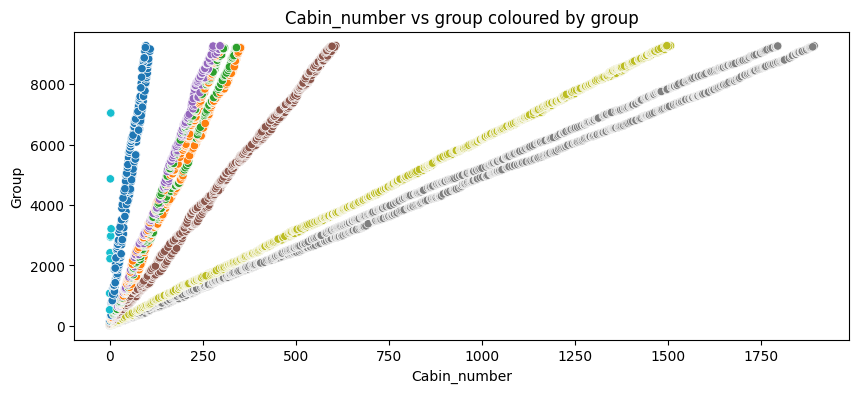

In [60]:
# Scatterplot
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['Cabin_number'], y=data['Group'], c=LabelEncoder().fit_transform(data.loc[~data['Cabin_number'].isna(),'Cabin_deck']), cmap='tab10')
plt.title('Cabin_number vs group coloured by group')

&emsp;&emsp;可以看出，Group和Cabin_number之间存在着线性的关系，所以我们可以根据二者线性关系来对我们Cabin_number的缺失值进行填充

In [61]:
data.isna().sum().sort_values(ascending=False)

Age_group        411
CryoSleep        310
ShoppingMall     306
Cabin_number     299
VIP              296
FoodCourt        289
Spa              284
Age              270
VRDeck           268
RoomService      263
Cabin_side         0
Cabin_region6      0
Cabin_region7      0
Cabin_region5      0
Cabin_region4      0
Cabin_region3      0
Cabin_region2      0
Cabin_region1      0
PassengerId        0
Group              0
Cabin_deck         0
Solo               0
Group_size         0
HomePlanet         0
No_spending        0
exp_sum            0
Destination        0
Family_size        0
dtype: int64

In [62]:
data.Cabin_deck.value_counts().sort_values(ascending=False)

Cabin_deck
F    4313
G    3909
E    1334
B    1161
C    1151
D     730
A     361
T      11
Name: count, dtype: int64

In [63]:
# Missing values before
CN_bef=data['Cabin_number'].isna().sum()

# Extrapolate linear relationship on a deck by deck basis
for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    # Features and labels
    X_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']
    y_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']
    X_test_CN=data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']

    # Linear regression
    model_CN=LinearRegression()
    # values.reshape(-1, 1)将其转化为二维数组，对于sklearn来说是必要的操作
    model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
    preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))
    
    # Fill missing values with predictions
    data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']=preds_CN.astype(int)

# Print number of missing values left
print('#Cabin_number missing values before:',CN_bef)
print('#Cabin_number missing values after:',data['Cabin_number'].isna().sum())

#Cabin_number missing values before: 299
#Cabin_number missing values after: 0


In [64]:
# One-hot encode cabin regions
data['Cabin_region1']=(data['Cabin_number']<300).astype(int)
data['Cabin_region2']=((data['Cabin_number']>=300) & (data['Cabin_number']<600)).astype(int)
data['Cabin_region3']=((data['Cabin_number']>=600) & (data['Cabin_number']<900)).astype(int)
data['Cabin_region4']=((data['Cabin_number']>=900) & (data['Cabin_number']<1200)).astype(int)
data['Cabin_region5']=((data['Cabin_number']>=1200) & (data['Cabin_number']<1500)).astype(int)
data['Cabin_region6']=((data['Cabin_number']>=1500) & (data['Cabin_number']<1800)).astype(int)
data['Cabin_region7']=(data['Cabin_number']>=1800).astype(int)

In [65]:
# VIP
data['VIP'].value_counts()

VIP
False    12401
True       273
Name: count, dtype: int64

In [66]:
data.isna().sum().sort_values(ascending=False)

Age_group        411
CryoSleep        310
ShoppingMall     306
VIP              296
FoodCourt        289
Spa              284
Age              270
VRDeck           268
RoomService      263
Cabin_region5      0
Cabin_region2      0
Cabin_region3      0
Cabin_region4      0
PassengerId        0
Cabin_region6      0
Cabin_side         0
Cabin_region7      0
Cabin_region1      0
Group              0
Cabin_number       0
Cabin_deck         0
Solo               0
Group_size         0
HomePlanet         0
No_spending        0
exp_sum            0
Destination        0
Family_size        0
dtype: int64

In [67]:
# Missing values before
V_bef=data['VIP'].isna().sum()

# Fill missing values with mode
# 这里直接假设他们都没有VIP
data.loc[data['VIP'].isna(),'VIP']=False

# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 296
#VIP missing values after: 0


In [68]:
pd.Series(data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'])

0     ((Earth, 0, 0, E), [34.0, 13.0, 25.0, 26.0, 24...
1     ((Earth, 0, 0, F), [26.0, 14.0, 21.0, 27.0, 23...
2     ((Earth, 0, 0, G), [18.0, 19.0, 26.0, 26.0, 31...
3     ((Earth, 0, 1, E), [35.0, 56.0, 24.0, 58.0, 49...
4     ((Earth, 0, 1, F), [24.0, 16.0, 44.0, 35.0, 28...
5     ((Earth, 0, 1, G), [48.0, 31.0, 32.0, nan, 62....
6     ((Earth, 1, 0, E), [1.0, 49.0, 29.0, 10.0, 1.0...
7     ((Earth, 1, 0, F), [28.0, 26.0, 18.0, 23.0, 19...
8     ((Earth, 1, 0, G), [28.0, 0.0, 55.0, 4.0, 21.0...
9     ((Earth, 1, 1, E), [6.0, 19.0, nan, 21.0, 36.0...
10    ((Earth, 1, 1, F), [27.0, 23.0, 18.0, 18.0, 54...
11    ((Earth, 1, 1, G), [30.0, 17.0, 36.0, 13.0, 35...
12    ((Europa, 0, 0, A), [58.0, 33.0, 27.0, 39.0, n...
13    ((Europa, 0, 0, B), [45.0, 32.0, 40.0, 42.0, 2...
14    ((Europa, 0, 0, C), [46.0, 33.0, 32.0, 33.0, 3...
15    ((Europa, 0, 0, D), [32.0, 33.0, 49.0, 29.0, 4...
16    ((Europa, 0, 0, E), [37.0, 30.0, 37.0, 36.0, 3...
17              ((Europa, 0, 0, T), [27.0, 44.0,

In [69]:
# Age
# Joint distribution
data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].median().unstack().fillna(0)

Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                       1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1           0      0.0   0.0   0.0   0.0   7.0  16.0   8.0   0.0
                       1      0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     0           0     35.0  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                       1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1           0     30.0  27.0  28.5  27.0  28.0   0.0   0.0   0.0
                       1     37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                       1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1           0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                       1      0.0   0.0   0.0  33.0  30.0  29.5   0.0   0.0

In [70]:
# Missing values before
A_bef=data[exp_feats].isna().sum().sum()

# Fill missing values using the median

# na_rows_A=data.loc[data['Age'].isna(),'Age'].index
# data.loc[:,'Age']=data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))

data.loc[:,'Age']=data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))

# Print number of missing values left
print('#Age missing values before:',A_bef)
print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 1410
#Age missing values after: 0


In [71]:
# Update age group feature
data.loc[data['Age']<=12,'Age_group']='Age_0-12'
data.loc[(data['Age']>12) & (data['Age']<18),'Age_group']='Age_13-17'
data.loc[(data['Age']>=18) & (data['Age']<=25),'Age_group']='Age_18-25'
data.loc[(data['Age']>25) & (data['Age']<=30),'Age_group']='Age_26-30'
data.loc[(data['Age']>30) & (data['Age']<=50),'Age_group']='Age_31-50'
data.loc[data['Age']>50,'Age_group']='Age_51+'

In [72]:
# Joint distribution
data.groupby(['No_spending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

CryoSleep,False,True
No_spending,,
0,7339.0,0.0
1,740.0,4581.0


&emsp;&emsp;可以看出，当CryoSleep为True时，不会有人去花钱

In [73]:
# Missing values before
CSL_bef=data['CryoSleep'].isna().sum()

# Fill missing values using the mode
# na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
data.loc[:,'CryoSleep']=data.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))

# Print number of missing values left
print('#CryoSleep missing values before:',CSL_bef)
print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 310
#CryoSleep missing values after: 0


In [74]:
print('Maximum expenditure of CryoSleep-True passengers in CryoSleep:',data.loc[data['CryoSleep']==True,exp_feats].sum(axis=1).max())
print('Maximum expenditure of CryoSleep-False passengers in CryoSleep:',data.loc[data['CryoSleep']==False,exp_feats].sum(axis=1).max())

Maximum expenditure of CryoSleep-True passengers in CryoSleep: 0.0
Maximum expenditure of CryoSleep-False passengers in CryoSleep: 35987.0


In [75]:
data.isna().sum().sort_values(ascending=False)

ShoppingMall     306
FoodCourt        289
Spa              284
VRDeck           268
RoomService      263
PassengerId        0
Cabin_deck         0
Cabin_region7      0
Cabin_region6      0
Cabin_region5      0
Cabin_region4      0
Cabin_region3      0
Cabin_region2      0
Cabin_region1      0
Cabin_side         0
Cabin_number       0
Group              0
Solo               0
Group_size         0
HomePlanet         0
No_spending        0
Age_group          0
exp_sum            0
VIP                0
Age                0
Destination        0
CryoSleep          0
Family_size        0
dtype: int64

In [76]:
# Missing values before
E_bef=data[exp_feats].isna().sum().sum()

# CryoSleep has no expenditure

for col in exp_feats:
    data.loc[(data[col].isna())&(data['CryoSleep']==True),col]=0
# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum)

#Expenditure missing values before: 1410
#Expenditure missing values after: <bound method Series.sum of RoomService     170
FoodCourt       179
ShoppingMall    172
Spa             173
VRDeck          172
dtype: int64>


In [77]:
# Joint distribution
data.groupby(['HomePlanet','Solo','Age_group'])['exp_sum'].mean().unstack().fillna(0)

Age_group        Age_0-12    Age_13-17    Age_18-25    Age_26-30    Age_31-50  \
HomePlanet Solo                                                                 
Earth      0          0.0   724.902222   789.700555   841.093596   736.655773   
           1          0.0   693.014898   779.395942   795.420690   794.818627   
Europa     0          0.0  1153.160256  2652.013298  3534.668246  3975.774005   
           1          0.0     0.000000  2489.888889  3806.000000  3949.939929   
Mars       0          0.0  1176.839286  1161.808333  1247.098361  1143.671916   
           1          0.0  1687.261538  1075.341146  1107.122677  1110.392045   

Age_group            Age_51+  
HomePlanet Solo               
Earth      0      733.649573  
           1      826.366972  
Europa     0     3483.639004  
           1     3952.085526  
Mars       0     1345.419643  
           1     1100.298387

In [78]:
# Missing values before
E_bef=data[exp_feats].isna().sum().sum()

# Fill remaining missing values using the median
for col in exp_feats:
    # na_rows=data.loc[data[col].isna(),col].index
    data.loc[:,col]=data.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))
    
# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 866
#Expenditure missing values after: 0


In [79]:
# Update expenditure and no_spending
data['exp_sum']=data[exp_feats].sum(axis=1)
data['No_spending']=(data['exp_sum']==0).astype(int)

In [80]:
data.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
exp_sum          0
Age_group        0
No_spending      0
Group            0
Group_size       0
Solo             0
Cabin_deck       0
Cabin_number     0
Cabin_side       0
Cabin_region1    0
Cabin_region2    0
Cabin_region3    0
Cabin_region4    0
Cabin_region5    0
Cabin_region6    0
Cabin_region7    0
Family_size      0
dtype: int64

&emsp;&emsp;可以看到，我们现在没有缺失值了，虽然我们有的处理方式可能会给后续的模型带来影响，但目前来看我们已经尽可能降低了不确定性，接下来进行特征工程

In [81]:
# Train and test
X=data[data['PassengerId'].isin(train['PassengerId'].values)].copy()
X_test=data[data['PassengerId'].isin(test['PassengerId'].values)].copy()

In [82]:
# Drop qualitative/redundant/collinear/high cardinality features
X.drop(['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin_number'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin_number'], axis=1, inplace=True)

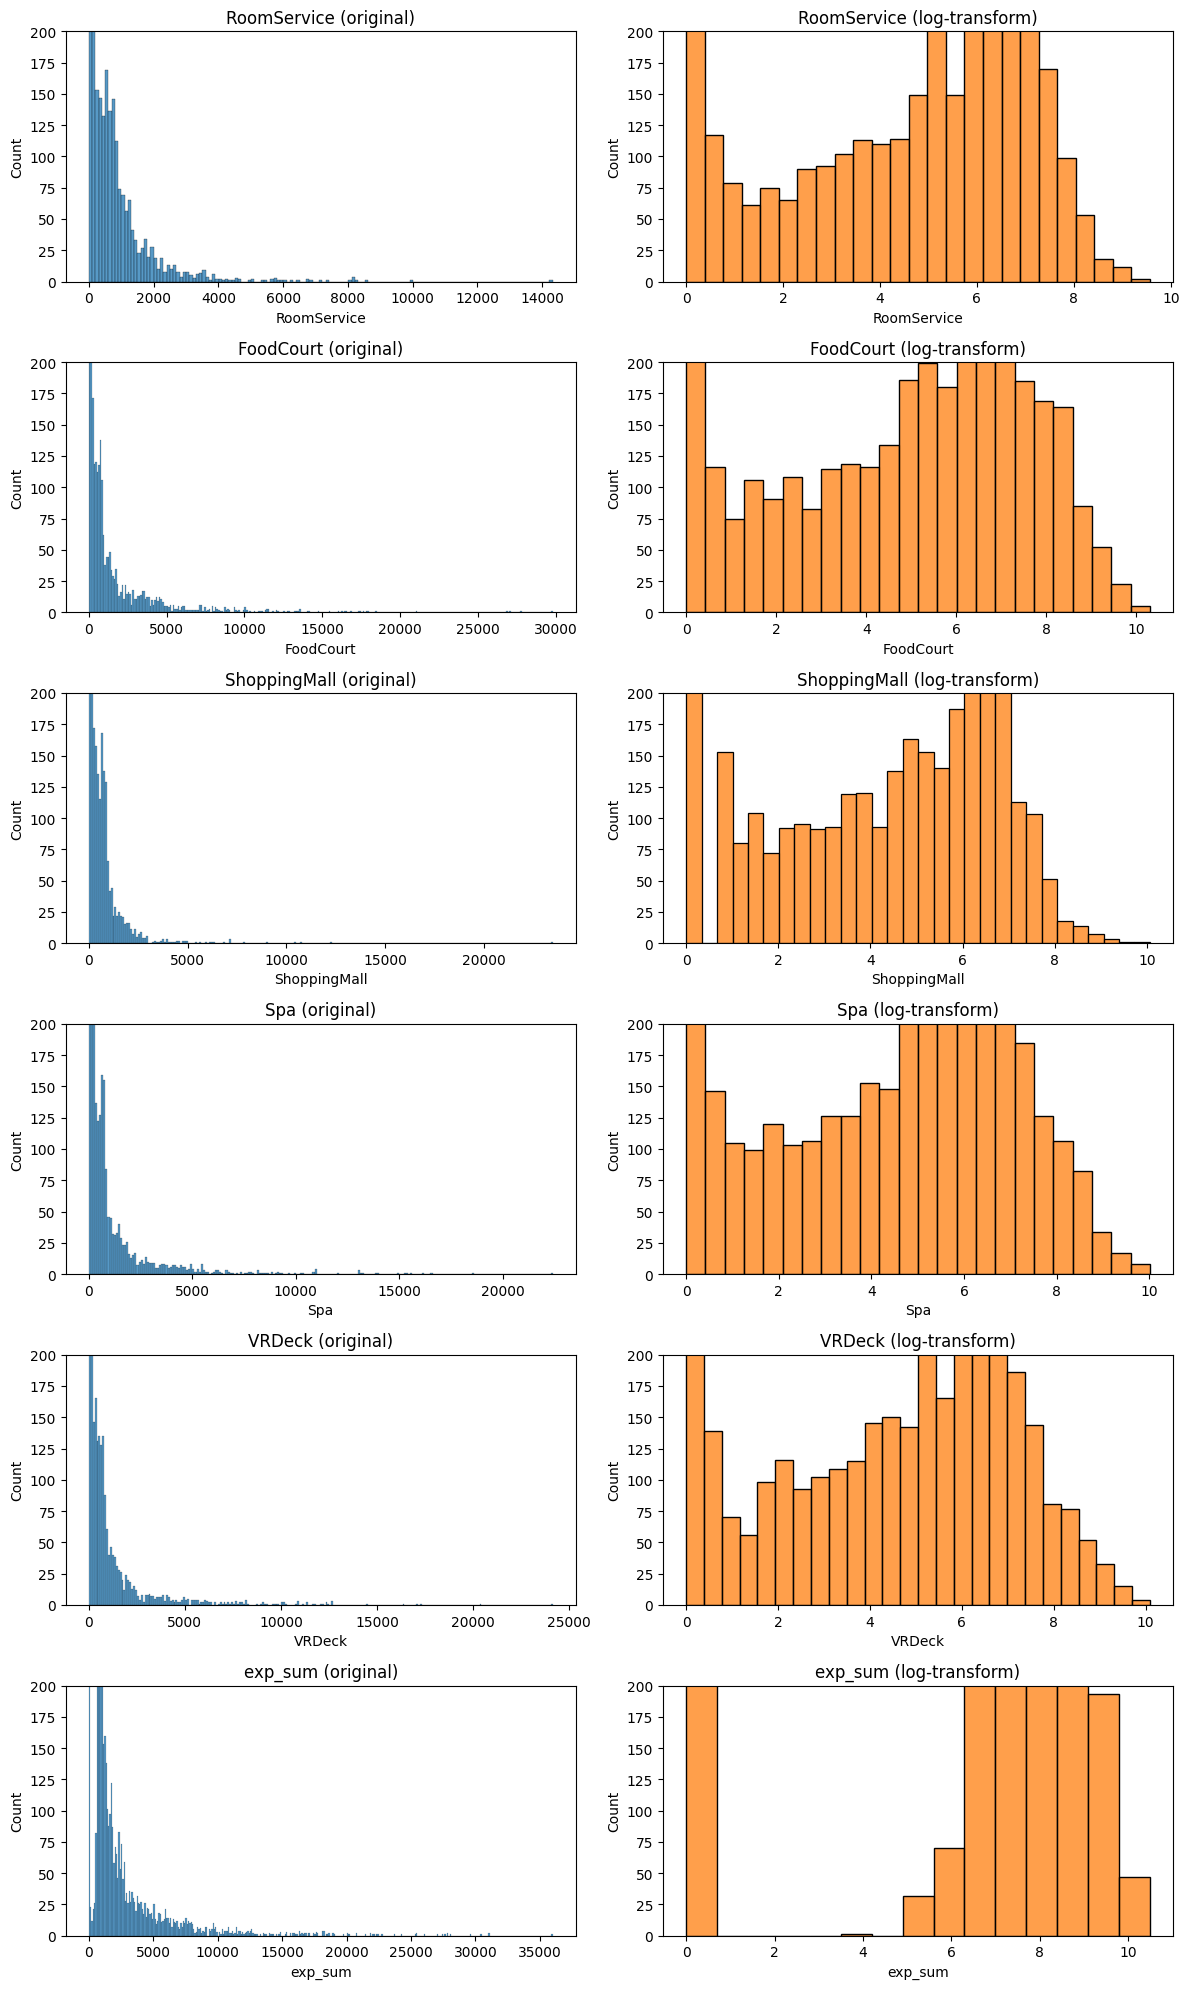

In [83]:
# Plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','exp_sum']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(X[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+X[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [84]:
# Apply log transform
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','exp_sum']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])

In [85]:
X.nunique()

HomePlanet          3
CryoSleep           2
Destination         3
Age                83
VIP                 2
RoomService      1296
FoodCourt        1531
ShoppingMall     1136
Spa              1352
VRDeck           1330
exp_sum          2627
No_spending         2
Solo                2
Cabin_deck          8
Cabin_side          3
Cabin_region1       2
Cabin_region2       2
Cabin_region3       2
Cabin_region4       2
Cabin_region5       2
Cabin_region6       2
Cabin_region7       2
Family_size        20
dtype: int64

In [86]:
# Indentify numerical and categorical columns
numerical_cols = [i for i in X.columns if X[i].dtype in ['int64', 'float64']]
categorical_cols = [i for i in X.columns if X[i].dtype == "object"]

# Scale numerical data to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough',
        sparse_threshold=0 
        )

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

# Print new shape
print('Training set shape:', X.shape)

Training set shape: (8693, 36)


In [87]:
import plotly.express as px
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

print(total_var)

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y,size=0.1*np.ones(len(X)), opacity = 1,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()

51.30673870657181


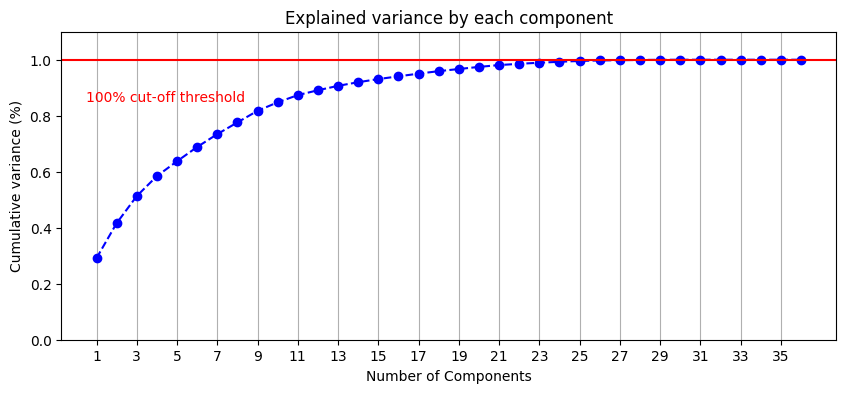

In [88]:
# Explained variance (how important each additional principal component is)
pca = PCA().fit(X)
fig, ax = plt.subplots(figsize=(10,4))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+X.shape[1], step=2))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red')
ax.grid(axis='x')

In [89]:
# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

In [90]:
# 定义分类器
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=0, probability=True),
    "RandomForest" : RandomForestClassifier(random_state=0),
    "XGBoost" : XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'), # XGBoost takes too long
    "LGBM" : LGBMClassifier(random_state=0),
    "CatBoost" : CatBoostClassifier(random_state=0, verbose=False),
    "NaiveBayes": GaussianNB()
}

# 定义超参数网格
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

# 整合到字典中
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "SVC" : SVC_grid,
    "RandomForest" : RF_grid,
    "XGBoost" : boosted_grid,
    "LGBM" : boosted_grid,
    "CatBoost" : boosted_grid,
    "NaiveBayes": NB_grid
}

In [91]:
import time
i=0
clf_best_params=classifiers.copy()
# np.zeros(len(classifiers))算是一个模版，初始化为0，随着后面算法的结果在进行填充
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_valid, y_valid)

    # 将最佳参数填入key对应的values中，方便我们后续查看最佳参数
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

Model: LogisticRegression
Training time (mins): 0.03

Model: KNN
Training time (mins): 0.01

Model: SVC
Training time (mins): 0.56

Model: RandomForest
Training time (mins): 0.11

Model: XGBoost
Training time (mins): 0.06

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1687
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Warning] No furt

In [92]:
# Show results
valid_scores.sort_values('Validation accuracy',ascending=False)

,Classifer,Validation accuracy,Training time
6,CatBoost,0.808511,2.01
4,XGBoost,0.801610,0.06
5,LGBM,0.797585,0.21
2,SVC,0.793560,0.56
3,RandomForest,0.790109,0.11
0,LogisticRegression,0.769983,0.03
1,KNN,0.755607,0.01
7,NaiveBayes,0.719379,0.00


In [93]:
# Show best parameters from grid search
clf_best_params

{'LogisticRegression': {'C': 0.75, 'max_iter': 100, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 1},
 'SVC': {'C': 1.25, 'gamma': 'scale', 'kernel': 'rbf'},
 'RandomForest': {'max_depth': 12, 'n_estimators': 150},
 'XGBoost': {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100},
 'LGBM': {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100},
 'CatBoost': {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 150},
 'NaiveBayes': {'var_smoothing': 1e-07}}

In [94]:
# Classifiers
best_classifiers = {
    "XGBoost" : XGBClassifier(**clf_best_params.get("XGBoost"), random_state=0),
    "CatBoost" : CatBoostClassifier(**clf_best_params.get("CatBoost"), verbose=False, random_state=0),
}

In [95]:
# 十折交叉验证
FOLDS=10

# 初始化一个长度与测试集相同的零数组，用于累积预测结果。
preds=np.zeros(len(X_test))

for key, classifier in best_classifiers.items():
    start = time.time()
    
    # 10-fold cross validation
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)
    
    score=0
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        # Get training and validation sets
        X_train, X_valid = X[train_idx], X[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]

        # Train model
        clf = classifier
        clf.fit(X_train, y_train)

        # Make predictions and measure accuracy
        preds += clf.predict_proba(X_test)[:,1]
        score += clf.score(X_valid, y_valid)

    # Average accuracy    
    score=score/FOLDS
    
    # Stop timer
    stop = time.time()

    # Print accuracy and time
    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')
    
# Ensemble predictions

preds=preds/(FOLDS*len(best_classifiers))


Model: XGBoost
Average validation accuracy: 81.1
Training time (mins): 0.01

Model: CatBoost
Average validation accuracy: 81.26
Training time (mins): 0.05



Text(0.5, 0, 'Probability')

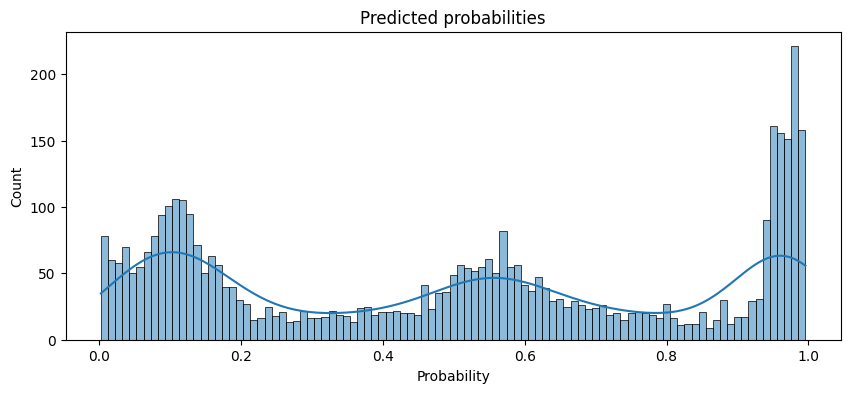

In [96]:
plt.figure(figsize=(10,4))
sns.histplot(preds, binwidth=0.01, kde=True)
plt.title('Predicted probabilities')
plt.xlabel('Probability')

In [97]:
# Proportion (in test set) we get from rounding
# np.round是进行四舍五入，目的是将预测结果中的数字划分为0和1
print(np.round(100*np.round(preds).sum()/len(preds),2))

52.93


Optimal threshold: 0.508


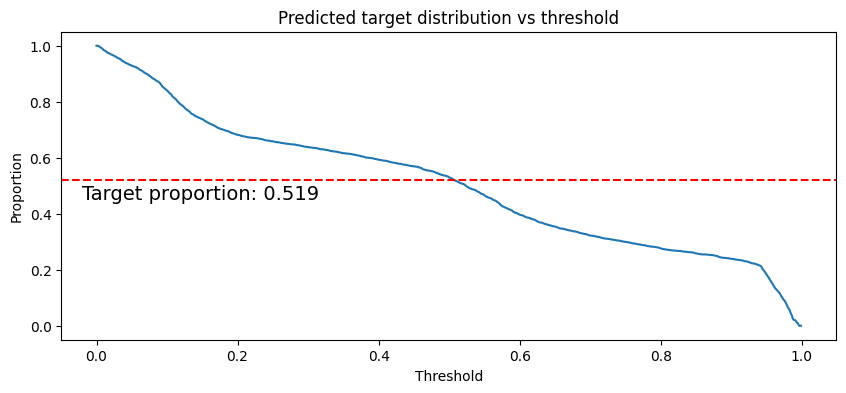

In [98]:
# Proportion of predicted positive (transported) classes
def preds_prop(preds_arr, thresh):
    pred_classes=(preds_arr>=thresh).astype(int)
    return pred_classes.sum()/len(pred_classes)

# Plot proportions across a range of thresholds
def plot_preds_prop(preds_arr):
    # Array of thresholds
    T_array=np.arange(0,1,0.001)
    
    # Calculate proportions
    prop=np.zeros(len(T_array))
    for i, T in enumerate(T_array):
        prop[i]=preds_prop(preds_arr, T)
        
    # Plot proportions
    plt.figure(figsize=(10,4))
    plt.plot(T_array, prop)
    target_prop=0.519         # Experiment with this value
    plt.axhline(y=target_prop, color='r', linestyle='--')
    plt.text(-0.02,0.45,f'Target proportion: {target_prop}', fontsize=14)
    plt.title('Predicted target distribution vs threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Proportion')
    
    # Find optimal threshold (the one that leads to the proportion being closest to target_prop)
    T_opt=T_array[np.abs(prop-target_prop).argmin()]
    print('Optimal threshold:', T_opt)
    return T_opt
    
T_opt=plot_preds_prop(preds)

In [99]:
# Classify test set using optimal threshold
preds_tuned=(preds>=T_opt).astype(int)

Text(0.5, 1.0, 'Prediction distribution')

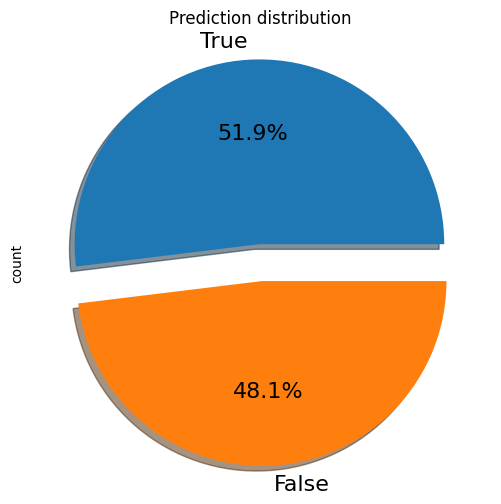

In [100]:
# Sample submission (to get right format)
sub=pd.read_csv('./sample_submission.csv')

# Add predictions
sub['Transported']=preds_tuned

# Replace 0 to False and 1 to True
sub=sub.replace({0:False, 1:True})

# Prediction distribution
plt.figure(figsize=(6,6))
sub['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")

In [101]:
# Output to csv
sub.to_csv('submission.csv', index=False)